<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

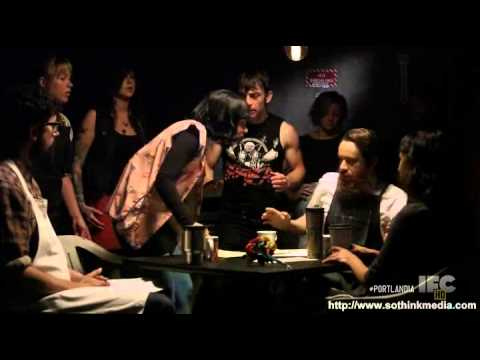

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
# Imports
import pandas as pd

import re
import squarify
import matplotlib.pyplot as plt

from collections import Counter

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [3]:
# Current working directory
%pwd

'/Users/JKMacBook/Documents/Lambda/NLP/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
# Load the data
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Clean full_review_text - remove date, check-in, keep on letters and numbers, convert to lowercase
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

# Convert star_rating to integer
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [6]:
shops.describe()

,star_rating
count,7616.000000
mean,4.169118
std,1.065311
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'austin', 'come', 'definitely', 'order',
                                            'spot', 'ordered'])

In [8]:
# Tokenizer pipe removing stop words and blank words and lemmatizing
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, date, night, ambiance, beautiful, love,...
2    [list, brunch, love, eclectic, homey, plush, d...
3    [cool, decor, good, drink, nice, seat, overpri...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

In [9]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [10]:
# Create a word count dataframe
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
139,good,3438,5367,1.0,0.016460,0.016460,0.451418
64,great,2844,3930,2.0,0.012053,0.028512,0.373424
150,like,2266,3361,3.0,0.010308,0.038820,0.297532
436,time,1752,2379,4.0,0.007296,0.046116,0.230042
25,drink,1650,2374,5.0,0.007281,0.053396,0.216649


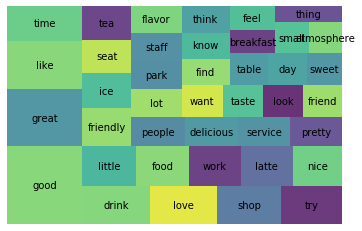

In [11]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [12]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [13]:
# Check top words for 4 and 5 ratings
shops_45 = shops[shops['star_rating'] >= 4]
good_count = count(shops_45['tokens'])
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
165,good,2726,4230,1.0,0.016659,0.016659,0.443974
64,great,2496,3461,2.0,0.013630,0.030289,0.406515
180,like,1672,2420,3.0,0.009530,0.039819,0.272313
8,love,1604,2117,4.0,0.008337,0.048156,0.261238
20,shop,1349,1813,5.0,0.007140,0.055296,0.219707
344,time,1331,1766,6.0,0.006955,0.062251,0.216775
25,drink,1285,1761,7.0,0.006935,0.069186,0.209283
87,try,1327,1704,8.0,0.006711,0.075897,0.216124
182,little,1250,1554,9.0,0.006120,0.082017,0.203583
21,latte,1031,1538,10.0,0.006057,0.088074,0.167915


In [14]:
# Check top words for 1 thru 3 ratings
shops_13 = shops[shops['star_rating'] <= 3]
bad_count = count(shops_13['tokens'])
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13,good,712,1137,1.0,0.015759,0.015759,0.482385
27,like,594,941,2.0,0.013043,0.028802,0.402439
29,drink,365,613,3.0,0.008496,0.037298,0.247290
179,time,421,613,4.0,0.008496,0.045795,0.285230
49,food,316,494,5.0,0.006847,0.052642,0.214092
57,great,348,469,6.0,0.006501,0.059142,0.235772
15,service,346,447,7.0,0.006196,0.065338,0.234417
167,shop,315,433,8.0,0.006002,0.071339,0.213415
98,try,338,427,9.0,0.005918,0.077258,0.228997
55,little,312,408,10.0,0.005655,0.082913,0.211382


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [15]:
def bad_counter(w):
    if w in bad_count['word'].values:
      bad_pct = bad_count.loc[bad_count['word'] == w, 'appears_in_pct'].item()
    else:
      bad_pct = 0
    
    return bad_pct

good_count['bad_appears_in_pct'] = good_count.apply(lambda x: bad_counter(x['word']), axis=1)

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct
165,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385
64,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772
180,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439
8,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954
20,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415
344,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230
25,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290
87,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997
182,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382
21,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827


In [16]:
good_count['appears_in_diff'] = good_count['appears_in_pct'] - good_count['bad_appears_in_pct']

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
165,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385,-0.038411
64,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
180,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
8,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
20,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415,0.006292
344,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230,-0.068455
25,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290,-0.038007
87,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997,-0.012874
182,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382,-0.007799
21,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827,0.012089


In [17]:
# The top 10 words for good shops
good_count.sort_values(by=['appears_in_diff'], ascending=False)[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
64,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
595,delicious,1178,1314,15.0,0.005175,0.116142,0.191857,0.056233,0.135624
8,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
141,friendly,1420,1487,12.0,0.005856,0.099790,0.231270,0.122629,0.108642
585,amaze,695,798,38.0,0.003143,0.203719,0.113192,0.031165,0.082027
179,perfect,623,699,47.0,0.002753,0.229865,0.101466,0.026423,0.075043
274,favorite,660,775,39.0,0.003052,0.206771,0.107492,0.034553,0.072939
492,awesome,556,619,61.0,0.002438,0.266116,0.090554,0.029133,0.061421
171,super,674,773,40.0,0.003044,0.209816,0.109772,0.066396,0.043376
381,recommend,598,630,59.0,0.002481,0.261241,0.097394,0.054878,0.042516


In [18]:
# The top 10 words for bad shops
good_count.sort_values(by=['appears_in_diff'])[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
180,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
521,okay,202,214,250.0,0.000843,0.524954,0.032899,0.144986,-0.112087
864,ask,310,345,135.0,0.001359,0.404371,0.050489,0.149051,-0.098563
325,service,861,933,26.0,0.003674,0.163384,0.140228,0.234417,-0.094189
411,taste,678,814,36.0,0.003206,0.197398,0.110423,0.192412,-0.081988
159,didnt,435,496,95.0,0.001953,0.339997,0.070847,0.151762,-0.080915
894,customer,273,307,160.0,0.001209,0.436459,0.044463,0.125339,-0.080876
63,wasnt,261,301,162.0,0.001185,0.438834,0.042508,0.116531,-0.074023
479,review,477,531,82.0,0.002091,0.313851,0.077687,0.151084,-0.073397
69,maybe,186,207,257.0,0.000815,0.530708,0.030293,0.103659,-0.073365


#### Analysis

It is clear from the data that shops with ratings of 4 and 5 have reviews that mention the following words more often than shops with rating of 1, 2 and 3:

great, delicious, love, friendly, amaze, perfect, favorite, awesome, super and recommend.

For shops with ratings of 1, 2 and 3 the following words dominated:

like, okay, ask, service, taste, didnt, customer, wasnt, review and maybe 

The charts above show that these 10 words have the greatest relative difference (appears_in_diff) between the good and the bad shops.  The result is calculated by counting the reviews in which the word appears in (appears_in) for good and bad shops, calculating the percent of the total reviews (appears_in_pct) for good shops, calculating the percent of total reviews in bad shops (bad_appears_in_pct), calculating the difference between the good and the bad shops (appears_in_diff).  Sorting (appears_in_diff) in ascending order provides the biggest difference between good and bad shops and sorting in descending order provides the biggest difference between bad and good shops.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

